## Quiñonez Tenorio Jair Andrés 
## Proyecto análisis de datos extraidos de una página web con Scrapy
## Tema: Series de la página DANIMADOS.COM

<ol> <strong>Preguntas/Items a presentar</strong>
    <li>Lanzadas por mes</li>
    <li>Cantidad por rating</li>
    <li>Cantidad de series por duracion de capitulos</li>
    <li>Series por votos acumulados</li>
    <li>Series por cantidad de votos</li>
    <li>Top Canales por Rating</li>
    <li>Series por canal</li>
    <li>Series por año de emicion</li>
    <li>Cantidad por generos combiados</li>
    <li>Porcentaje por generos divididos</li>
    <li>Generos por duracion</li>
    <li>Generos por meses</li>
    <li>Top canal por votos</li>
    <li>Rating por votos acumulados</li>
    <li>Generos por años</li>
    <li>Generos por votos acumulados</li>
    <li>Porcentaje de Canales</li>
    <li>Series termiandas por meses</li>
    <li>Series Terminadas por años</li>
    <li>Series y fechas de culminacion (Series terminadas)</li>
    <li>Porcentaje de series terminadas</li>
</ol>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
path_csv = 'E:\EPN\Python\ReposPY\py-quinonez-jair\Proyectos_indivuales\Scrapy_Quinonez\proyecto_scrapy\data\series.csv'
df_scrapy = pd.read_csv(path_csv)[5:150]
df_scrapy['votes'] = pd.to_numeric(df_scrapy['votes'],errors='coerce')

In [2]:
df_scrapy


,name_serie,release_date,channel,runtime,end_date,genre,rating,votes
5,Inspector Ardilla,"Oct. 19, 2015",Nickelodeon,22m,"May. 12, 2018",Animacion,9.5,NaN
6,Folktales from Japan,"Jul. 03, 2014",HuluFunimation Channel,22m,"Mar. 27, 2015",Action & Adventure,9.6,NaN
7,Assassination Classroom,"Oct. 03, 2002",TV TokyoStudio Pierrot,20m,"Feb. 08, 2007",Action & Adventure,9.6,999.0
8,La Pantera Rosa e Hijos,"Dec. 17, 1989",Fox Broadcasting Company,22m,"Oct. 15, 2017",Animacion,9.5,991.0
9,Orange,"Jul. 19, 2003",Cartoon Network,22m,"Jan. 16, 2006",Action & Adventure,9.7,929.0
...,...,...,...,...,...,...,...,...
145,Digimon Fusion / Xros Wars (Digimon Hunters),"Apr. 04, 2016",TV Tokyo,25m,"Sep. 19, 2016",Action & Adventure,9.4,95.0
146,Proyecto Z,"Jul. 07, 2017",Netflix,24m,"Jul. 07, 2017",Action & Adventure,9.2,94.0
147,Dientes de lata,"Oct. 01, 1976",TV Asahi,25m,"Feb. 02, 1979",Animacion,9.8,94.0
148,Bungou Stray Dogs,"Sep. 13, 1993",The WB Television Network,22m,"Nov. 14, 1998",Animacion,9.3,92.0


## Lanzadas por mes 


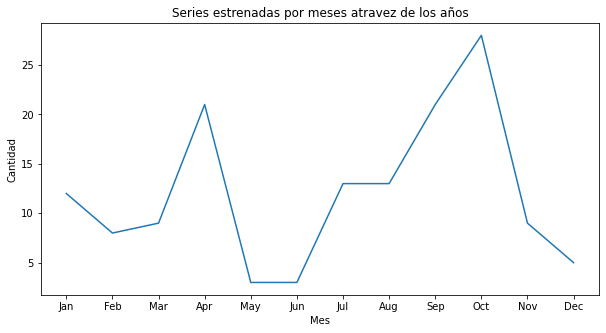

In [3]:

meses = df_scrapy['release_date'].str.split(".",2).str[0]
en_meses = meses.value_counts()
orderen = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
en_meses.index = pd.CategoricalIndex(en_meses.index, categories=orderen, ordered=True)
en_meses = en_meses.sort_index()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(en_meses.index, en_meses.values)
plt.title("Series estrenadas por meses atravez de los años")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()



## Cantidad por rating 

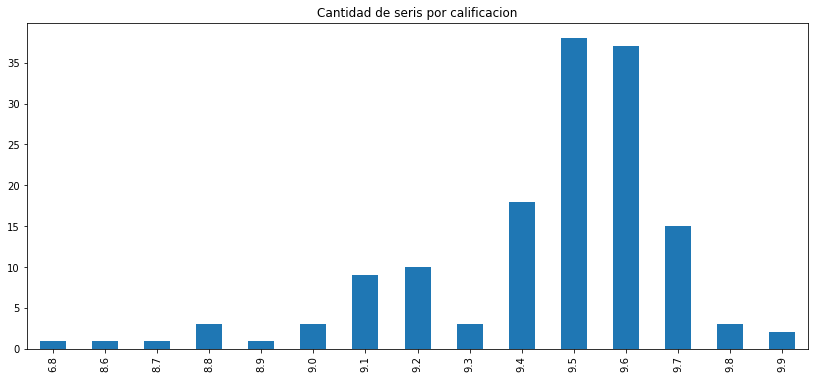

In [4]:
cali = df_scrapy['rating'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
plt.title('Cantidad de seris por calificacion')
plt.show()

## Cantidad de series por duracion de capitulos


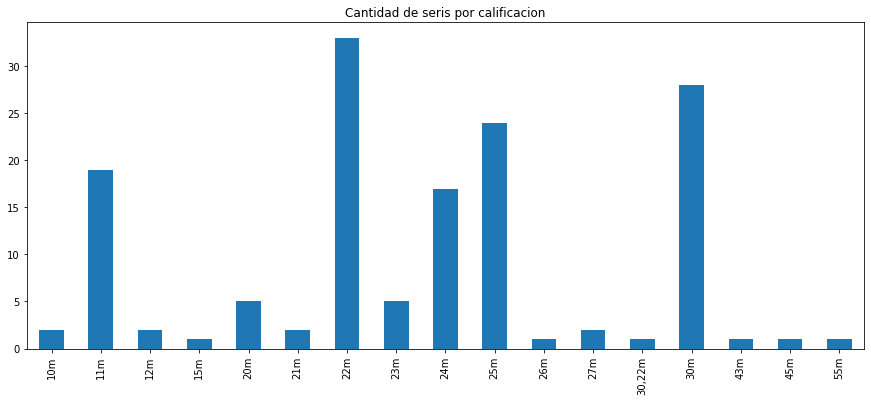

In [5]:
duracion = df_scrapy['runtime'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title('Cantidad de seris por calificacion')
plt.show()

## Series por votos acumulados 


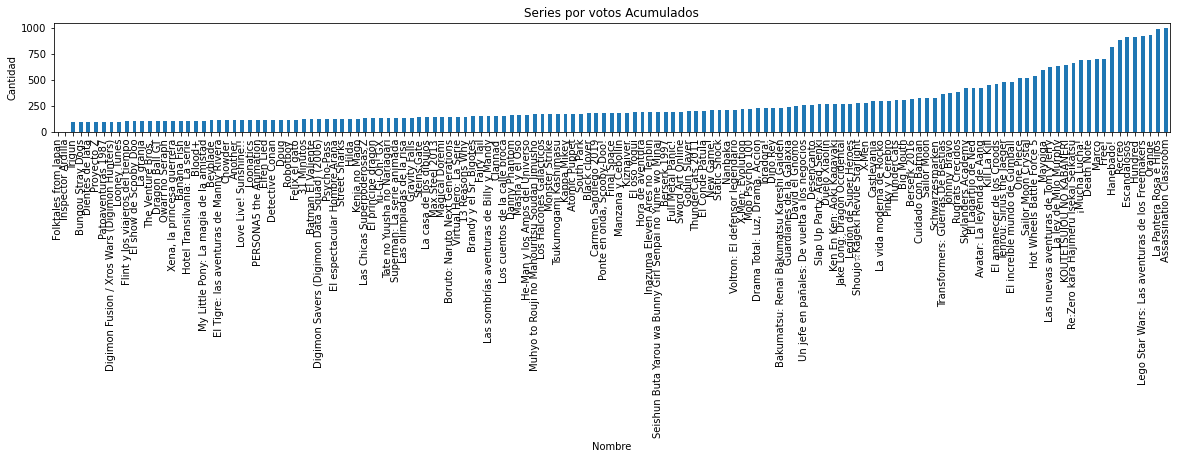

In [6]:
serie_votes = df_scrapy[['name_serie', 'votes']]
se_voto = serie_votes.groupby('name_serie')['votes'].sum()
se_voto = se_voto.sort_values(axis=0, ascending=True)
se_voto.plot(kind='bar',figsize=(20,2))
plt.title('Series por votos Acumulados')
plt.xlabel('Nombre')
plt.ylabel('Cantidad')
plt.show()

## Series por cantidad de votos

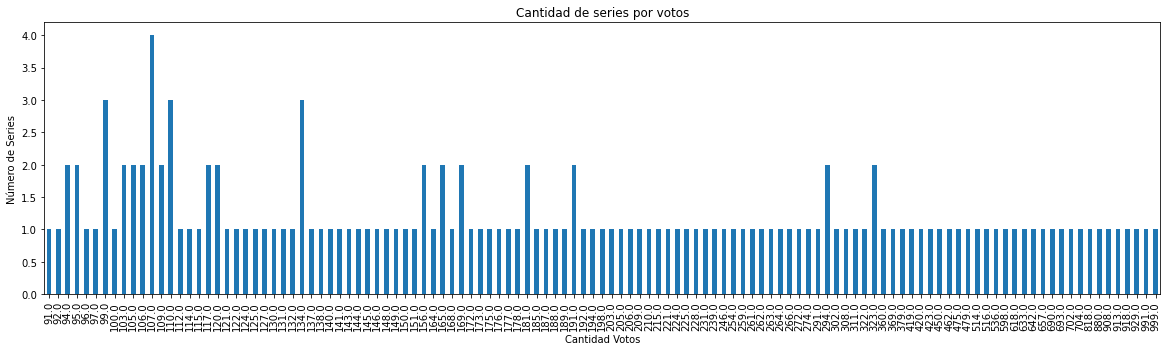

In [7]:
votos = df_scrapy['votes'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))
plt.title('Cantidad de series por votos')
plt.xlabel("Cantidad Votos")
plt.ylabel("Número de Series")
plt.show()

## Top Canales por Rating

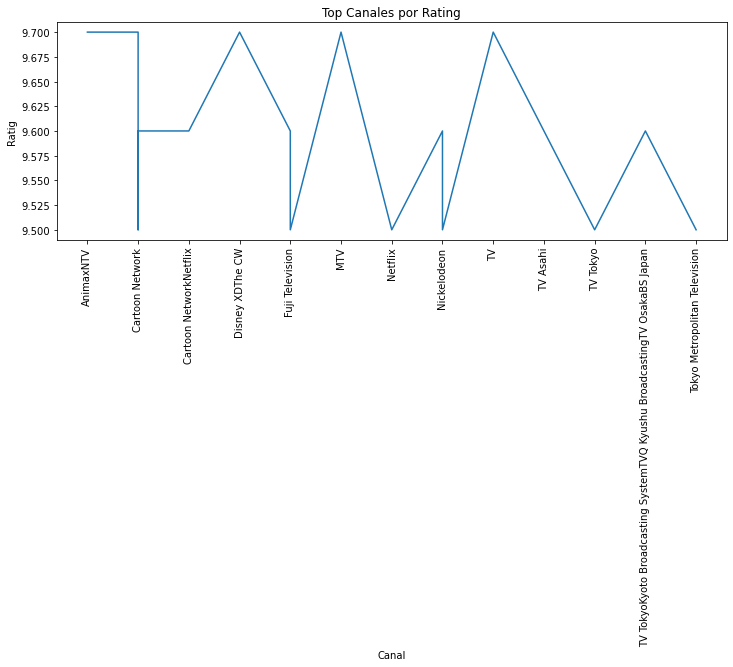

In [8]:
canal = df_scrapy[['channel','rating']][8:30].sort_values(by=['channel'], ascending= True)
rating_c = pd.Series(canal['rating'].values, index=canal['channel'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(rating_c.index, rating_c.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Ratig')
plt.xlabel('Canal')
plt.title('Top Canales por Rating')
plt.show()


## Series por canal

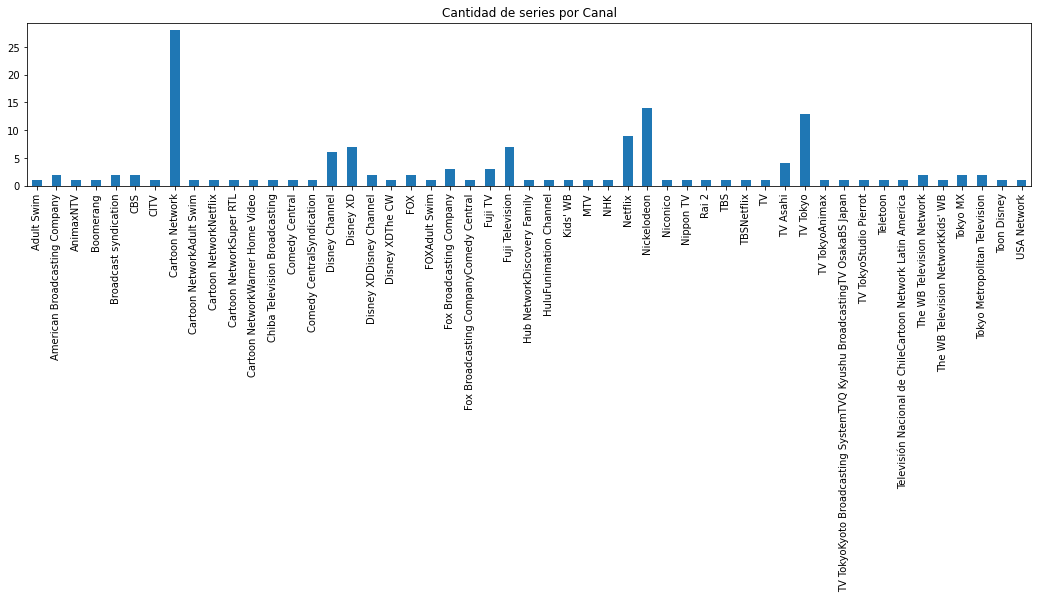

In [9]:
serie_c = df_scrapy['channel'].value_counts().sort_index().plot(kind='bar', figsize=(18,3))
plt.title('Cantidad de series por Canal')
plt.show()

## Series por año de emicion 

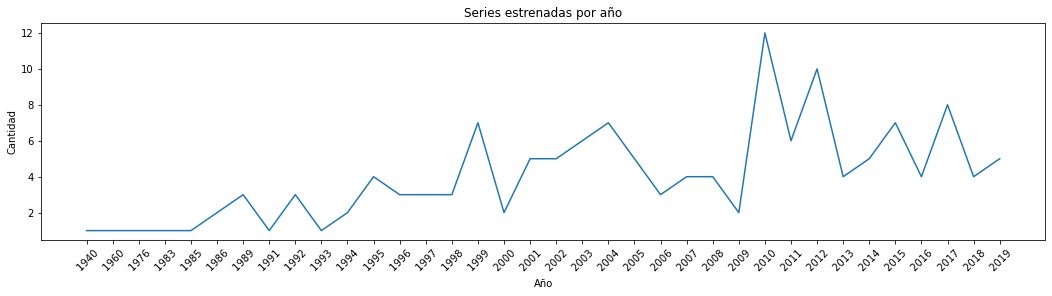

In [10]:
anio = df_scrapy['release_date'].str.split(",",2).str[1]
en_anio = anio.value_counts()
en_anio = en_anio.sort_index()
fig, ax = plt.subplots(figsize=(18,4))
ax.plot(en_anio.index, en_anio.values) 
plt.title("Series estrenadas por año")
plt.xticks(rotation='45')
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

## Cantidad por generos combiados

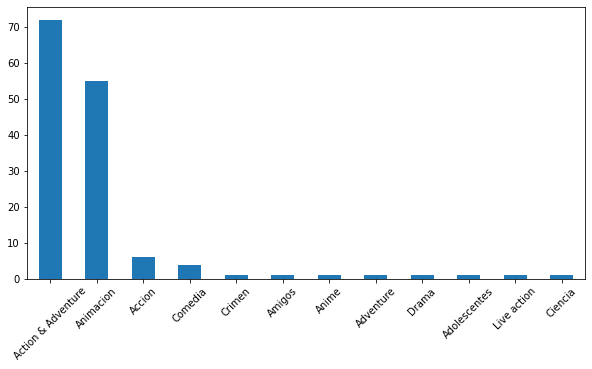

In [11]:
genero = df_scrapy['genre'].value_counts().plot(kind='bar', figsize=(10,5), rot=45)

## Porcentaje por generos divididos

Text(0.5, 1.0, 'Peliculas de los 5 generos mas altos')

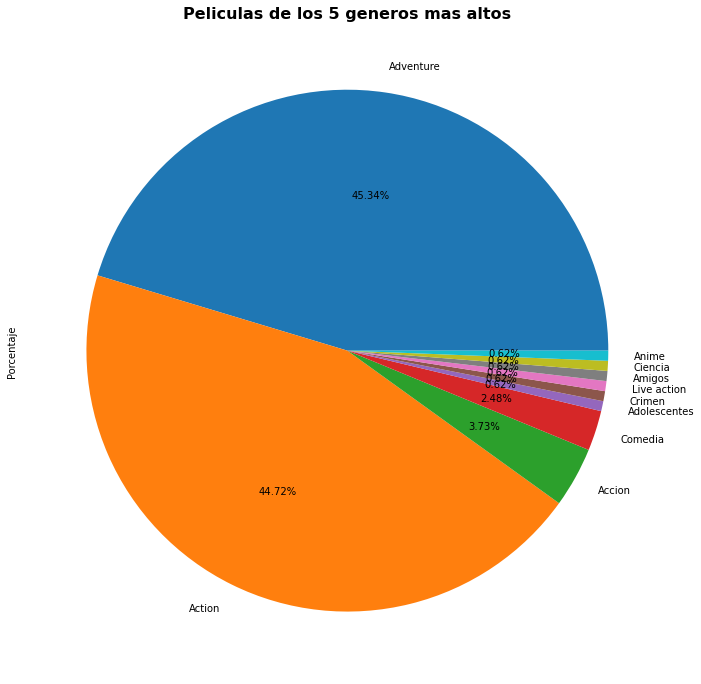

In [12]:
seperate_genre='Action','Adventure','Accion','Comedia','Adolescentes','Crimen','Live action','Amigos','Ciencia','Anime'

genre_pcts = np.zeros(len(seperate_genre))
i = 0
for genre in seperate_genre:
    current_genre = df_scrapy['genre'].str.contains(genre).fillna(False)
    pct = len(df_scrapy[current_genre]) / 1000 * 100
    genre_pcts[i] = pct
    i += 1
    #print(genre, pct)
genre_pcts_df = pd.DataFrame(genre_pcts, index=seperate_genre, columns=['Porcentaje'])
genre_pcts_df

#graficar
genre_pcts_df.sort_values(by='Porcentaje', ascending=False).plot.pie(legend=False,subplots=True,autopct='%.2f%%',figsize=(12,12))
plt.title('Peliculas de los 5 generos mas altos', weight='bold', fontsize=16)

## Generos  por duracion 

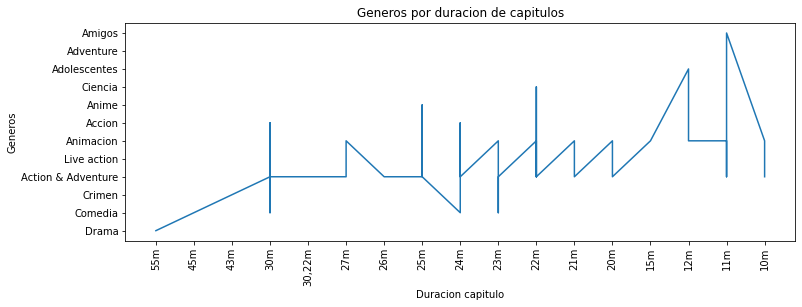

In [13]:
gen_duracion = df_scrapy[['runtime','genre']].sort_values(by=['runtime'], ascending= False)
g_duracion = pd.Series(gen_duracion['genre'].values, index=gen_duracion['runtime'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(g_duracion.index, g_duracion.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Generos')
plt.xlabel('Duracion capitulo')
plt.title('Generos por duracion de capitulos')
plt.show()


## Generos por meses

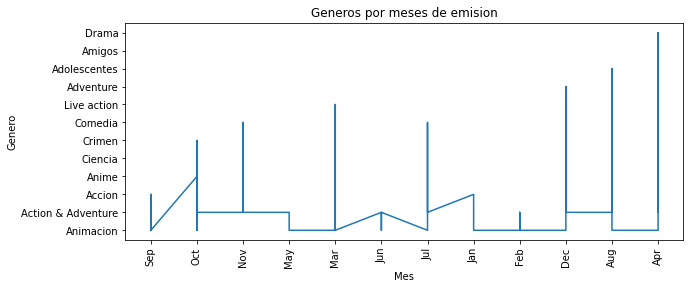

In [14]:
mes = df_scrapy['release_date'].str.split(".",2).str[0].sort_values(ascending=False)
gen = df_scrapy['genre']
g_mes = pd.Series(gen.values, index=mes)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(g_mes.index, g_mes.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Genero')
plt.xlabel('Mes')
plt.title('Generos por meses de emision')
plt.show()

## Top canal por votos 



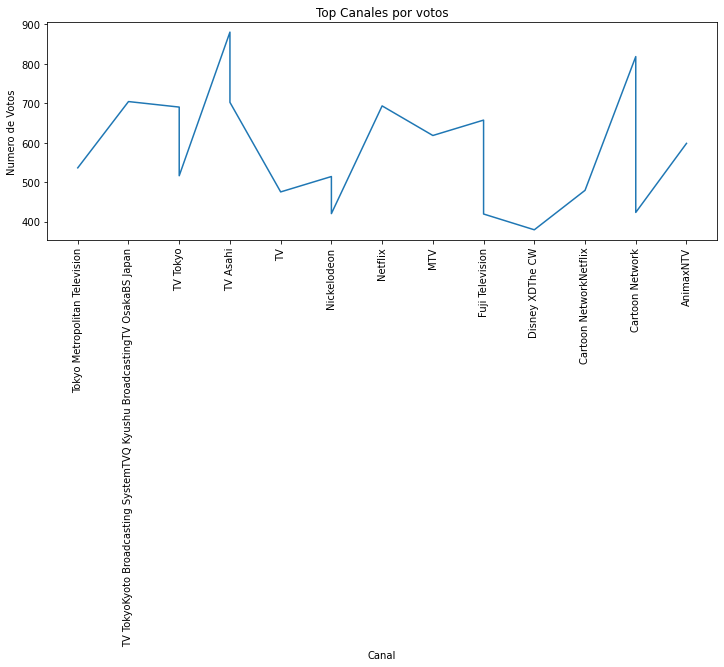

In [15]:
canal = df_scrapy[['channel','votes']][8:30].sort_values(by=['channel'], ascending= False)
voto = pd.Series(canal['votes'].values, index=canal['channel'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(voto.index, voto.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Numero de Votos')
plt.xlabel('Canal')
plt.title('Top Canales por votos')
plt.show()


## Rating por votos acumulados

<AxesSubplot:xlabel='rating'>

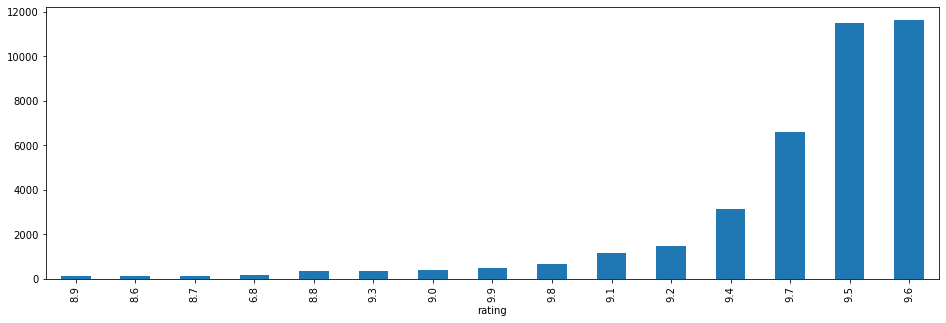

In [16]:
#df_scrapy['votes'] = df_scrapy['votes'].astype(int)
#df_scrapy['votes'] = pd.to_numeric(df_scrapy['votes'],errors='coerce')
rating_votes = df_scrapy[['rating', 'votes']]
ra_voto = rating_votes.groupby('rating')['votes'].sum()
ra_voto = ra_voto.sort_values(axis=0, ascending=True)
ra_voto.plot(kind='bar',figsize=(16,5))

## Generos por años

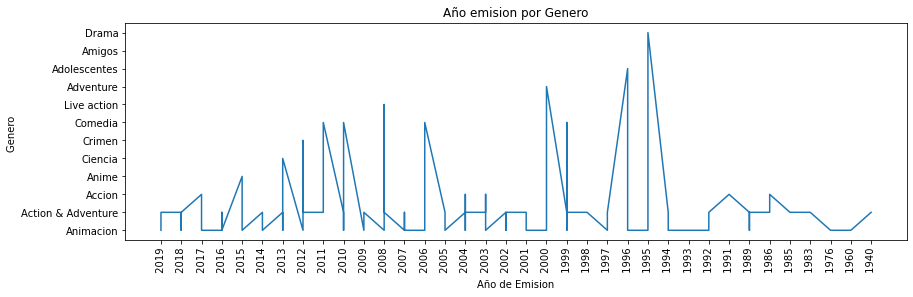

In [17]:
anio = df_scrapy['release_date'].str.split(",",2).str[1].sort_values(ascending=False)
gen = df_scrapy['genre']
voto = pd.Series(gen.values, index=anio)
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(voto.index, voto.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Genero ')
plt.xlabel('Año de Emision')
plt.title('Año emision por Genero')
plt.show()


## Generos por votos acumulados 

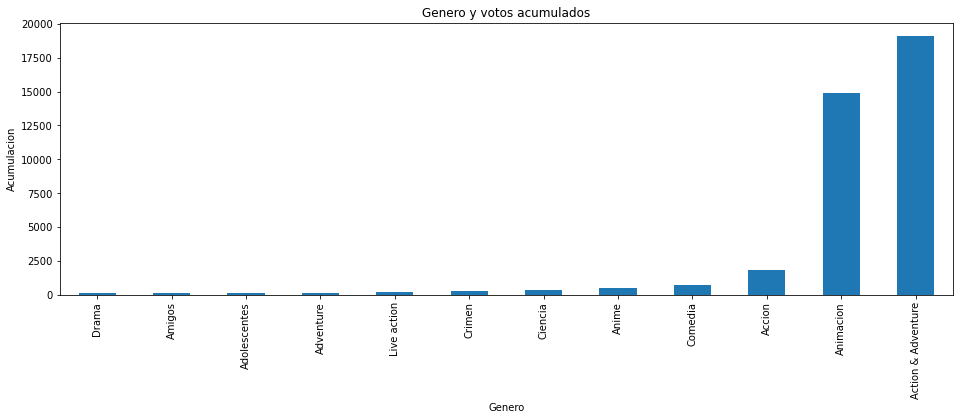

In [18]:
rating_votes = df_scrapy[['genre', 'votes']]
ra_voto = rating_votes.groupby('genre')['votes'].sum()
ra_voto = ra_voto.sort_values(axis=0, ascending=True)
ra_voto.plot(kind='bar',figsize=(16,5))
plt.ylabel('Acumulacion')
plt.xlabel('Genero')
plt.title('Genero y votos acumulados')
plt.show()

## Porcentaje de Canales 

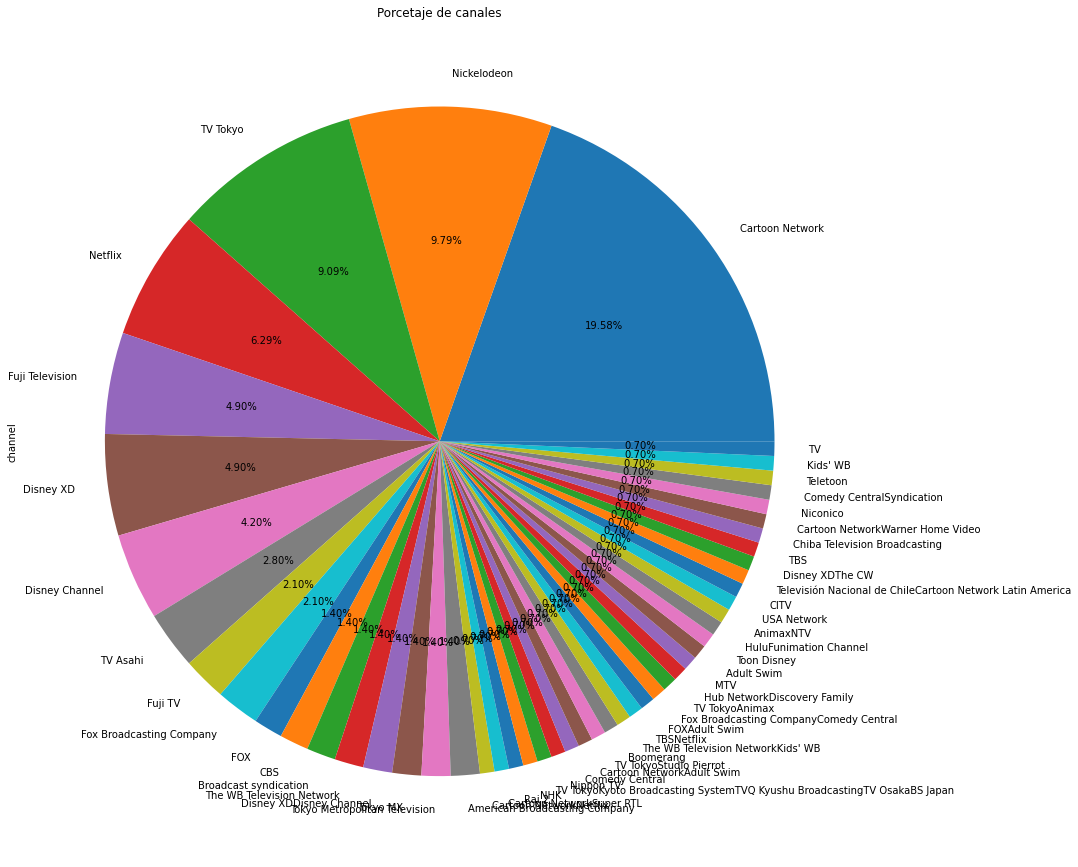

In [19]:
canales_p= df_scrapy['channel'].value_counts().plot.pie(autopct='%.2f%%',figsize=(15,40))
plt.title('Porcetaje de canales')
plt.show()

## Series termiandas por meses

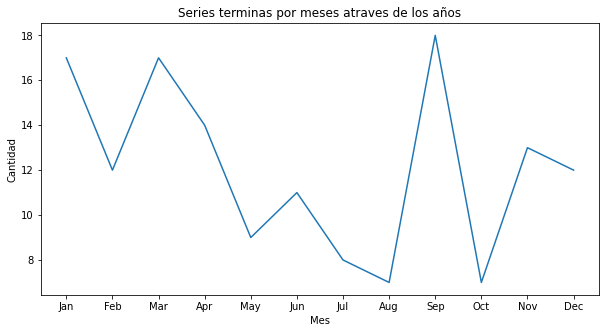

In [20]:
meses = df_scrapy['end_date'].str.split(".",2).str[0]
en_meses = meses.value_counts()
orderen = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
en_meses.index = pd.CategoricalIndex(en_meses.index, categories=orderen, ordered=True)
en_meses = en_meses.sort_index()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(en_meses.index, en_meses.values)
plt.title("Series terminas por meses atraves de los años")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()


## Series Terminadas por años 


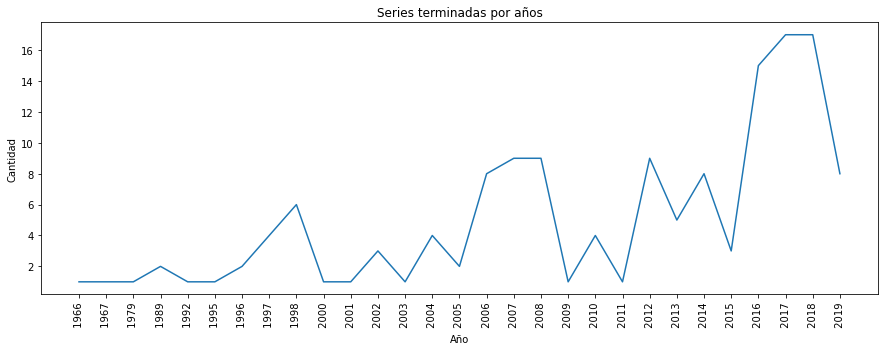

In [21]:
anios = df_scrapy['end_date'].str.split(",",2).str[1]
te_anio = anios.value_counts()
te_anio = te_anio.sort_index()
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(te_anio.index, te_anio.values)
plt.title("Series terminadas por años")
plt.xlabel("Año")
plt.xticks(rotation='vertical')
plt.ylabel("Cantidad")
plt.show()


## Series y fechas de culminacion (Series terminadas)

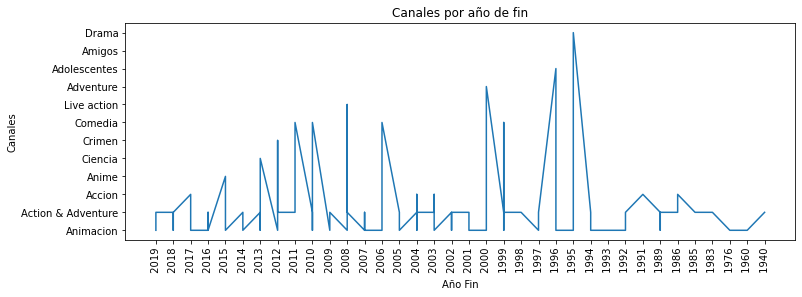

In [22]:
canal_fin = df_scrapy[['channel','end_date']][8:30].sort_values(by=['channel'], ascending= False)
fin = pd.Series(canal_fin['channel'].values, index=canal_fin['end_date'])
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(voto.index, voto.values) 
plt.xticks(rotation='vertical')
plt.ylabel('Canales')
plt.xlabel('Año Fin')
plt.title('Canales por año de fin')
plt.show()


## Porcentaje de series terminadas

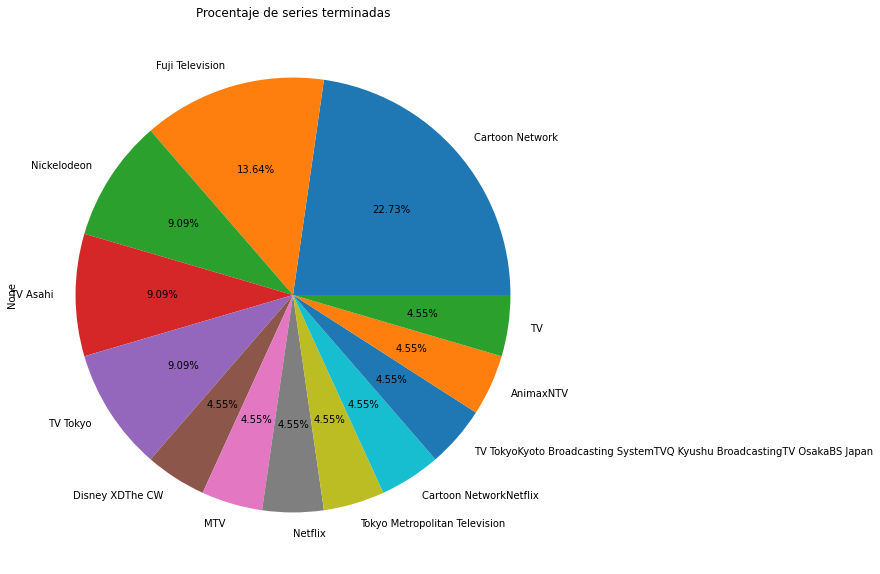

In [23]:
canal_en = df_scrapy[['channel','end_date']][8:30].sort_values(by=['channel'], ascending= False)
por_canal_en = pd.Series(canal_en['channel'].values, index=canal_en['end_date']).value_counts().plot.pie(autopct='%.2f%%',figsize=(10,10))
plt.title('Procentaje de series terminadas')
plt.show()